In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#Uses Jupyter's own backend to plot
%matplotlib inline

**Show all rows**

In [2]:
#Show all rows and columns
pd.set_option("max_rows", None)
pd.set_option("max_columns", None)

#To do - questions to answer

Get to know the dataset
 - ~~Initial visualization~~
 - What type of mental disorders are there?


Data cleaning
 - Change column titles
 - Change all NAN to numerical values 
     - Gender
         - ~~Change gender to male, female, other~~
         - ~~Visualize % of gender and age in each country~~
     - Mental health disorder columns
         - Anxiety Disorder (Generalized, Social, Phobia, etc)
         - Mood Disorder (Depression, Bipolar Disorder, etc)
         - Psychotic Disorder (Schizophrenia, Schizoaffective, etc)
         - Eating Disorder (Anorexia, Bulimia, etc)
         - Attention Deficit Hyperactivity Disorder
         - Personality Disorder (Borderline, Antisocial, Paranoid, etc)
         - Obsessive-Compulsive Disorder
         - Post-Traumatic Stress Disorder
         - Stress Response Syndromes
         - Dissociative Disorder
         - Substance Use Disorder
         - Addictive Disorder
     
     
Question to answer
 - Are people who are self imployed have more mental disorders?
     - Look how many self employed/employee there are
     - Compare how many of them **currently** have mental disorders
 - Have you ever been diagnosed with mental health disorder
     - If possible, what disorders do you believe you have?
         - Find out which disorders answers belong to this question
     - If so, what disorders were you diagnosed with?
         - Find out which disorders answers belong to this question
 - Do you currently have a mental disorder?
 - Have you had a mental health disorder in the past?

## Data exploration

In [3]:
#Read original CSV, make a copy of it
surveyO = pd.read_csv("Dataset/Mental_Health_in_Tech_2020_OSMI.csv")
surveyC = surveyO.copy() #Make changes here instead of the original df

In [10]:
surveyC.head(5)

,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Have you ever had a coworker discuss their or another coworker's mental health with you?,Describe the conversation your coworker had with you about their mental health (please do not use names).,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",*Do you have previous employers?*,Was your employer primarily a tech company/organization?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.",Would you have been willing to discuss your mental health with yo

In [11]:
print("Number of rows: {}, Number of columns: {}".format(surveyC.shape[0], surveyC.shape[1]))

Number of rows: 180, Number of columns: 105


##### Dropping columns

In [7]:
#Check for NaN values
surveyC.isna().sum()
#surveyC.isna().mean() #Check what how much % NaN takes of the column

#When it comes to mental health disorders there are 3 types: "name_of_mhd", "name_of_mhd.1", "name_of_mhd.2"
#If we check the documentation, we can see the questions they're related to: 

#"What disorder(s) have you been diagnosed with?" = "name_of_mhd"
#"If possibly, what disorder(s) do you believe you have?" = "name_of_mhd.1"
#"If so, what disorder(s) were you diagnosed with?" = "name_of_mhd.2"

#We can see that "name_of_mhd.1" and "name_of_mhd.2" have values, whereas "name_of_mhd" is all NaN's. Most probably, this was a
#question that hasn't been answered by the users. Thus, we can drop this column

surveyC = surveyC.drop([
    "#",
    "Anxiety Disorder (Generalized, Social, Phobia, etc)",
    "Mood Disorder (Depression, Bipolar Disorder, etc)",
    "Psychotic Disorder (Schizophrenia, Schizoaffective, etc)",
    "Eating Disorder (Anorexia, Bulimia, etc)",
    "Attention Deficit Hyperactivity Disorder",
    "Personality Disorder (Borderline, Antisocial, Paranoid, etc)",
    "Obsessive-Compulsive Disorder",
    "Post-Traumatic Stress Disorder",
    "Stress Response Syndromes",
    "Dissociative Disorder",
    "Substance Use Disorder",
    "Addictive Disorder",
    "Other",
    "Describe the circumstances of the supportive or well handled response."
    ], axis=1)

In [8]:
#Check for NaN values > 0
null_vals = surveyC.isnull().sum().sort_values().to_frame() #Returns a series, thus we need to make a df
null_vals = null_vals.loc[null_vals[0] != 0] #Find only the columns that have a null
null_vals

,0
What is your gender?,2
Have you had a mental health disorder in the past?,4
Have you ever discussed your mental health with coworkers?,25
"Overall, how much importance does your employer place on mental health?",25
Does your employer offer resources to learn more about mental health disorders and options for seeking help?,25
"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",25
Does your employer provide mental health benefits as part of healthcare coverage?,25
Is your employer primarily a tech company/organization?,25
"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",25
Is your primary role within your company related to tech/IT?,25


In [9]:
print("Number of Columns that have more than 1 NaN is: {}".format(null_vals.shape[0]))

Number of Columns that have more than 1 NaN is: 86


##### Find countries column

In [10]:
user_country = surveyC["country"].value_counts()

Lets plot the countries to have a better understanding

https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values/51535326#51535326

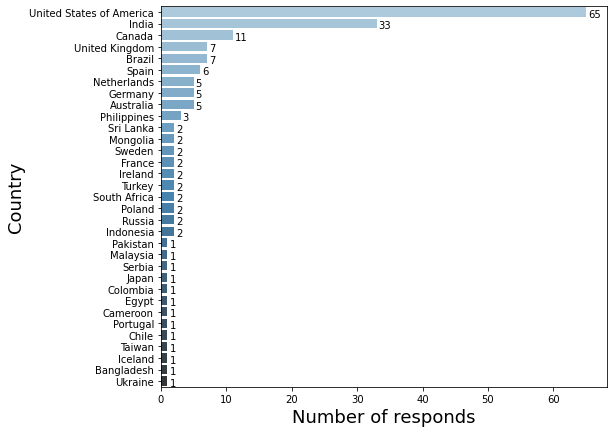

In [11]:
plt.figure(figsize=(8, 7))
sns_country = sns.barplot(x=user_country.values, y=user_country.index, palette=("Blues_d"))
plt.xlabel("Number of responds", fontsize=18)
plt.ylabel("Country", fontsize=18)

def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(sns_country, "h", 0.3)

## Data cleaning and visualzing

We saw that there were quite a few NANs, lets deal with them

- Change column titles

In [18]:
#Change column names for easier use
surveyC.rename(columns = {"*Are you self-employed?*":"self_employed",
                          "What country do you *live* in?":"country",
                          "How many employees does your company or organization have?":"num_employees",
                          "Is your employer primarily a tech company/organization?":"is_tech_company",
                          "Is your primary role within your company related to tech/IT?":"is_role_in_tech",
                          "Does your employer provide mental health benefits as part of healthcare coverage?":"mh_coverage",
                          "Do you know the options for mental health care available under your employer-provided health coverage?":"options_in_mh_coverage",
                          "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?":"employer_mh_disc",
                          "Does your employer offer resources to learn more about mental health disorders and options for seeking help?":"employer_offer_mh_res",
                          "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?":"mh_sa_anonimity",
                          "If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?":"mh_leave_difficulty",
                          "Would you feel more comfortable talking to your coworkers about your physical health or your mental health?":"coworker_comfort_reveal_ph_mh_disc",
                          "Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?":"supervisor_comfort_mh_disc",
                          "Have you ever discussed your mental health with your employer?":"employer_reveal_mh_disc",
                          "Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.":"employer_reveal_mh_disc_results",
                          "Would you feel comfortable discussing a mental health issue with your coworkers?":"coworker_comfort_mh_disc",
                          "Have you ever discussed your mental health with coworkers?":"coworker_reveal_mh_disc",
                          "Describe the conversation with coworkers you had about your mental health including their reactions.":"coworker_reveal_mh_disc_results",
                          "Have you ever had a coworker discuss their or another coworker's mental health with you?":"coworker_confine_mh_disc",
    
                          "What is your gender?":"gender",
                          "What is your age?":"age",
                         "Do you *currently* have a mental health disorder?":"currently_has_mhd"}, 
               inplace=True)

- Change and encode mental health disorders

In [21]:
#Check number of unique values for each column, Will help us know how to encode
{column: len((surveyC[column]).unique()) for column in surveyC.select_dtypes("object").columns}

{'num_employees': 7,
 'mh_coverage': 5,
 'options_in_mh_coverage': 3,
 'employer_mh_disc': 4,
 'employer_offer_mh_res': 4,
 'mh_sa_anonimity': 4,
 'mh_leave_difficulty': 7,
 'coworker_comfort_reveal_ph_mh_disc': 4,
 'supervisor_comfort_mh_disc': 4,
 'employer_reveal_mh_disc_results': 35,
 'coworker_comfort_mh_disc': 4,
 'coworker_reveal_mh_disc_results': 54,
 'Describe the conversation your coworker had with you about their mental health (please do not use names).': 51,
 'Do you know local or online resources to seek help for a mental health issue?': 4,
 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?': 6,
 'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?': 5,
 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?': 6,
 'If you have revealed a mental health disorder t

In [22]:
#Check unique values for each column, Will help us know how to encode
{column: list(surveyC[column].unique()) for column in surveyC.select_dtypes("object").columns}

{'num_employees': [nan,
  'More than 1000',
  '500-1000',
  'Jun-25',
  '26-100',
  '100-500',
  '01-May'],
 'mh_coverage': [nan,
  'Yes',
  'No',
  "I don't know",
  'Not eligible for coverage / NA'],
 'options_in_mh_coverage': [nan, 'No', 'Yes'],
 'employer_mh_disc': [nan, 'Yes', "I don't know", 'No'],
 'employer_offer_mh_res': [nan, 'Yes', 'No', "I don't know"],
 'mh_sa_anonimity': [nan, "I don't know", 'Yes', 'No'],
 'mh_leave_difficulty': [nan,
  'Very easy',
  'Somewhat easy',
  'Difficult',
  'Neither easy nor difficult',
  'Somewhat difficult',
  "I don't know"],
 'coworker_comfort_reveal_ph_mh_disc': [nan,
  'Physical health',
  'Mental health',
  'Same level of comfort for each'],
 'supervisor_comfort_mh_disc': [nan, 'Yes', 'Maybe', 'No'],
 'employer_reveal_mh_disc_results': [nan,
  'discussed anxiety disorder and desire to WFH more \nfrequently. they honored this request with no problem.',
  'awkwardness',
  'I had to take leave for several days due to a mood episode that ca

In [85]:
mh_list = [
    "Anxiety Disorder (Generalized, Social, Phobia, etc).1",
    
]

def mh_encode(df, column):
    for row, col in df[column].iterrows():
        if df[column].isna():
            #df[column].replace(to_replace=column, value=0, inplace=True)
            print(True)
        else:
            #df[column].replace(to_replace=column, value=1, inplace=True)
            print(False)

#surveyC["Anxiety Disorder (Generalized, Social, Phobia, etc)"].isna()
#mh_encode(surveyC, ["Anxiety Disorder (Generalized, Social, Phobia, etc)"])
#if surveyC["Eating Disorder (Anorexia, Bulimia, etc).1"].isna():
#def x_t(df, column):
#for i in range(len(mh_list)):
        #surveyC[i].fillna(0, inplace=True)
        #surveyC[i].replace(to_replace=mh_list[0][0], value=1, inplace=True)

surveyC["Eating Disorder (Anorexia, Bulimia, etc).1"].fillna(0, inplace=True)
surveyC["Eating Disorder (Anorexia, Bulimia, etc).1"].replace(surveyC["Eating Disorder (Anorexia, Bulimia, etc).1"]!= 0, 1, inplace=True)
surveyC["Eating Disorder (Anorexia, Bulimia, etc).1"].value_counts()

ValueError: Series.replace cannot use dict-like to_replace and non-None value

- Change and encode gender column 

In [8]:
#Make all values to lowercase and see the unique values
#surveyC["gender"].uniqe()
surveyC["gender"] = surveyC["gender"].str.lower()

In [11]:
#Categorize gender into: male, female, other
male_str = ["male", "mail", "m", "mostyl male", "mostly male", "cisgender male"]
fmale_str = ["female", "f", "woman", "she/her", "female, she/her"]

#Iterate through dataset and change the values
for (row, column) in surveyC.iterrows():
    if column["gender"] in male_str:
        surveyC["gender"].replace(to_replace=column["gender"],
                                              value=1, inplace=True)
    elif column["gender"] in fmale_str:
        surveyC["gender"].replace(to_replace=column["gender"],
                                               value=2, inplace=True)
    else: 
        surveyC["gender"].fillna(3, inplace=True)

In [12]:
surveyC["gender"].value_counts()

1    116
2     62
3      2
Name: gender, dtype: int64

In [33]:
#Example of a scenario to do a for loop, Series has a property of value_counts
#print(surveyC["What is your gender?"].value_counts().male)
#print(surveyC["What is your gender?"].value_counts().female)
#def count_str_occurences(df, column, values=[]):
#    total_instances = 0
#    if len(values) == 0 or None:
#        print("Please insert string values for 'values' in the following manner: values=['val1', 'val2']")
#    else:
#        for i in range(len(values)):
#            total_instances += df[column].value_counts().values[i]
#            print("For '{}', there's {} instances".format(values[i], df[column].value_counts().values[i]))
#    print("-"*20)
#    print("Total instances:", total_instances)
            
#count_str_occurences(surveyC, "gender", values=['male', 'female', 'other'])

In [46]:
#Plot age and gender in each country
#plt.figure(figsize=(12, 8))
#x = sns.barplot(x="country",
#                y="age",
#                hue="gender",
#                data=surveyC)

#If x and y axes are shifted
#for item in x.get_xticklabels():
#    item.set_rotation(90)

In [15]:
#surveyC["Other.2"].unique()

In [16]:
#Check how many times "Autism Spectrum Disorder" appears in the df
#(surveyC["Other.2"].values == "Autism Spectrum Disorder").sum()

In [17]:
#Let's check if we can insert Autism disorder to the right column
#surveyC.loc[surveyC["Other.2"] == "Autism Spectrum Disorder"]

In [18]:
#User 83 has benn diagnosed with a autism disorder yet there isn't any 
#appropriate column for it, so let's make one: "Autism spectrum disorder"


In [19]:
#Check which user inserted Latino, there should be a race column 
#survey.index[survey["Other.3"]== "Latino "] #Get only the index
#surveyC.loc[survey["Other.3"] == "Latino "] #Gets more information about the user

In [20]:
#Check what user 39's value for race
#survey["What is your race?"][survey.index[39]]

In [21]:
#Fill in "Latino" value for user 39 in race column
#surveyC.loc[[39], "What is your race?"] = "Latino"

In [22]:
#Check how many times "Latino " appears in the df (Note: it has whitespace)
#(surveyC["Other.3"].values == "Latino ").sum()

## Encoding data

## Answering questions

- Are people who are self imployed have more mental disorders?

In [174]:
#Have a look at the values and dtype
surveyC["self_employed"].value_counts()

#How do we know what is yes or no? Assuming we don't have access to the ones 
#that made the survey, we can infer by looking at the column "How many employees does your company or organization have?"
#If they didn't put any value, it means that they're most likely self employed
#Thus, 1 = yes, 0 = no
#num_na = surveyC["How many employees does your company or organization have?"].isna().sum()
#num_na

#Check answers
surveyC["currently_has_mhd"].value_counts()

No            58
Yes           51
Possibly      47
Don't Know    24
Name: currently_has_mhd, dtype: int64

In [23]:
#Save the copy
#surveyC.to_csv("Dataset/Mental_Health_in_Tech_2020_OSMI-COPY.csv:)